# Меня ждут миллионы

Обучите простую модель предсказания цены акций. Используйте один из рассмотренных на лекции "Временные последовательности" алгоритмов предсказания рядов. Можно использовать и более сложные алгоритмы предсказания рядов


1. Найдите данные о цене любого биржевого актива

    Данные должны содержать значение цены актива как минимум за каждый день и длительностю как минимум за год. 

    Найти данные можно на kaggle или использовать FAANG датасет из 1 лабораторной


2. Предобработайте данные

    Временной ряд сложно предсказывать по дням. Сделайте ряд по неделям или месяцам
   
    Удалите из ряда тренд, если он есть. Используйте другие рассмотренные на лекции приёмы


3. Обучите модель
    
    Обучите модель на 80% временного ряда
    
    Предскажите оставшиеся 20% (как минимум 3 точки) ряда с помощью модели 
    
    Отобразите на графике предсказание модели и истинные данные


4. Посчитайте метрику

    Метрика должна отражать разницу между предсказанными и истинными данными. Можно выбрать меру MAPE, можно предложить свою

In [1]:
import pandas as pd

google_price = pd.read_csv('./google_price.csv')
google_price.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,736.789978,738.989990,732.500000,733.530029,733.530029,1301300
1,2016-03-29,734.590027,747.250000,728.760010,744.770020,744.770020,1903800
2,2016-03-30,750.099976,757.880005,748.739990,750.530029,750.530029,1782400
3,2016-03-31,749.250000,750.849976,740.940002,744.950012,744.950012,1718800
4,2016-04-01,738.599976,750.340027,737.000000,749.909973,749.909973,1576700
5,2016-04-04,750.059998,752.799988,742.429993,745.289978,745.289978,1134200
6,2016-04-05,738.000000,742.799988,735.369995,737.799988,737.799988,1132300
7,2016-04-06,735.770020,746.239990,735.559998,745.690002,745.690002,1053700
8,2016-04-07,745.369995,747.000000,736.280029,740.280029,740.280029,1453200
9,2016-04-08,743.969971,745.450012,735.549988,739.150024,739.150024,1290800


In [2]:
google_price.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [3]:
google_price['Date'] = pd.to_datetime(google_price['Date'], format='%Y-%m-%d')

google_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1260 non-null   datetime64[ns]
 1   Open       1260 non-null   float64       
 2   High       1260 non-null   float64       
 3   Low        1260 non-null   float64       
 4   Close      1260 non-null   float64       
 5   Adj Close  1260 non-null   float64       
 6   Volume     1260 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [4]:
google_price.shape

(1260, 7)

In [5]:
google_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,1147.178547,1158.696803,1136.546811,1148.050058,1148.050058,1.628621e+06
std,315.399648,320.708354,311.384816,316.044823,316.044823,7.128469e+05
min,671.000000,672.299988,663.283997,668.260010,668.260010,3.468000e+05
25%,928.647476,932.752518,922.000000,928.510025,928.510025,1.199200e+06
50%,1109.075012,1122.565002,1098.335022,1109.859985,1109.859985,1.450000e+06
75%,1278.017487,1294.860046,1271.057495,1289.940033,1289.940033,1.832425e+06
max,2119.270020,2152.679932,2104.360107,2128.310059,2128.310059,6.207000e+06


In [6]:
google_price.drop(['Open', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace = True)

google_price.head()

,Date,High
0,2016-03-28,738.989990
1,2016-03-29,747.250000
2,2016-03-30,757.880005
3,2016-03-31,750.849976
4,2016-04-01,750.340027


In [7]:
google_price = google_price.tail(-4)

google_price.head()

,Date,High
4,2016-04-01,750.340027
5,2016-04-04,752.799988
6,2016-04-05,742.799988
7,2016-04-06,746.239990
8,2016-04-07,747.000000


In [8]:
import datetime
last_month = -1

df = pd.DataFrame(columns=['Date', 'High'])
for row in google_price.itertuples():
    if (last_month != row.Date.month):
        last_month = row.Date.month
        df = df.append({'Date': datetime.date(row.Date.year, row.Date.month, 1),
                        'High': row.High}, ignore_index=True)
        
google_price = df
google_price.shape

(60, 2)

In [9]:
google_price = google_price.set_index(['Date'])

google_price.head(10)

,High
Date,
2016-04-01,750.340027
2016-05-01,700.640015
2016-06-01,737.210022
2016-07-01,700.650024
2016-08-01,780.429993
2016-09-01,771.020020
2016-10-01,776.065002
2016-11-01,789.489990
2016-12-01,759.849976


<AxesSubplot:title={'center':'Original'}, ylabel='High'>

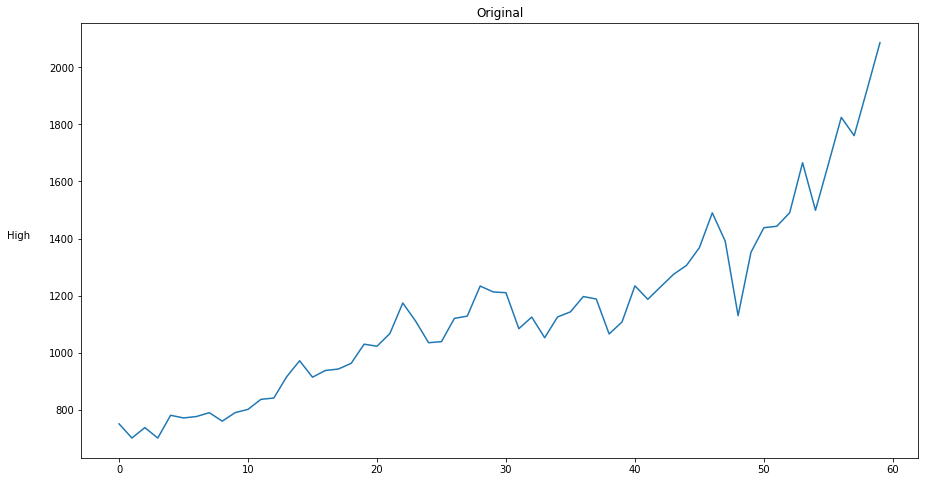

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.title('Original')
plt.ylabel('High', rotation=0, labelpad=30)
df['High'].plot()

<Figure size 1080x1440 with 0 Axes>

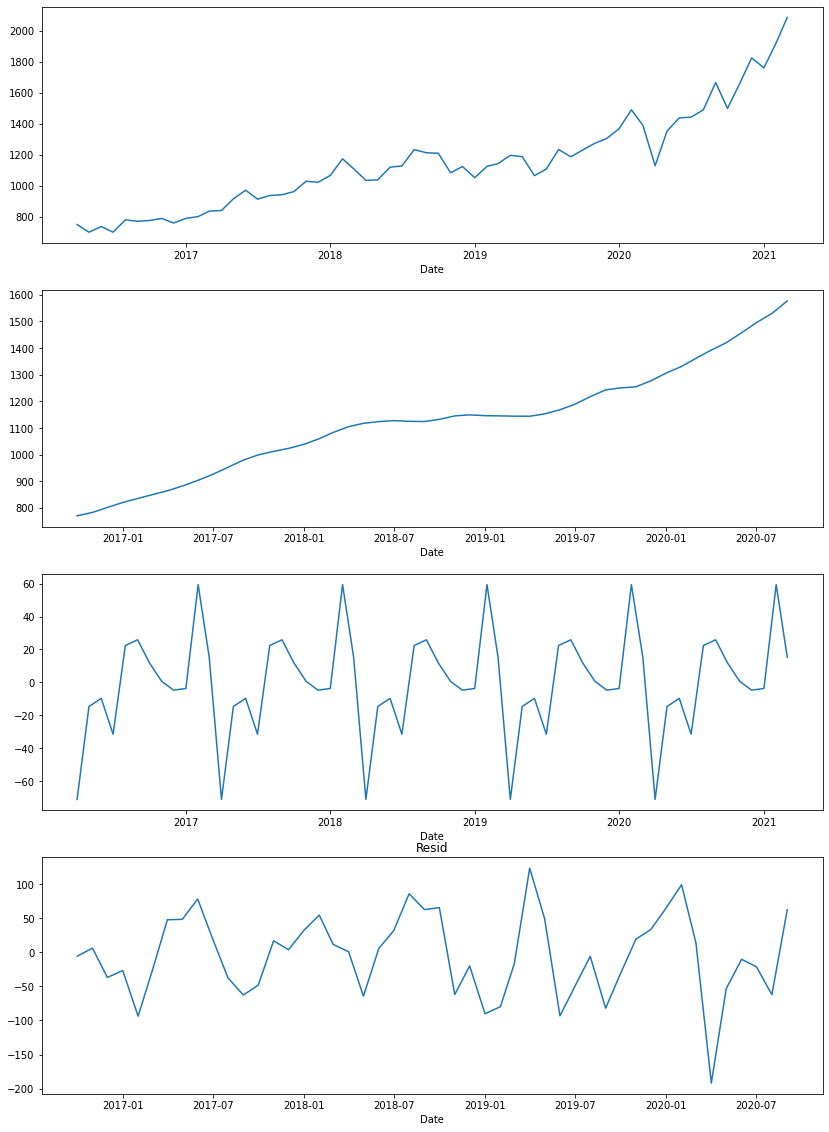

In [11]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(15, 20))
decomposition = seasonal_decompose(google_price['High'], period=12)
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 20))

plt.title('Observed')
decomposition.observed.plot(ax=ax[0])

plt.title('Trend')
decomposition.trend.plot(ax=ax[1])

plt.title('Seasonal')
decomposition.seasonal.plot(ax=ax[2])

plt.title('Resid')
decomposition.resid.plot(ax=ax[3]);

In [12]:
from statsmodels.tsa.stattools import adfuller

p_value = adfuller(google_price['High'])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергается в пользу альтернативной!'
)

Полученный уровень значимости (p-value): 0.9982. 0.9982 > 0.05. Нулевая гипотеза не отвергается в пользу альтернативной!


In [13]:
google_price['HighDiff_1'] = google_price.diff()
google_price.head()

,High,HighDiff_1
Date,,
2016-04-01,750.340027,NaN
2016-05-01,700.640015,-49.700012
2016-06-01,737.210022,36.570007
2016-07-01,700.650024,-36.559998
2016-08-01,780.429993,79.779968


<AxesSubplot:title={'center':'Diff'}, xlabel='Date', ylabel='HighDiff_1'>

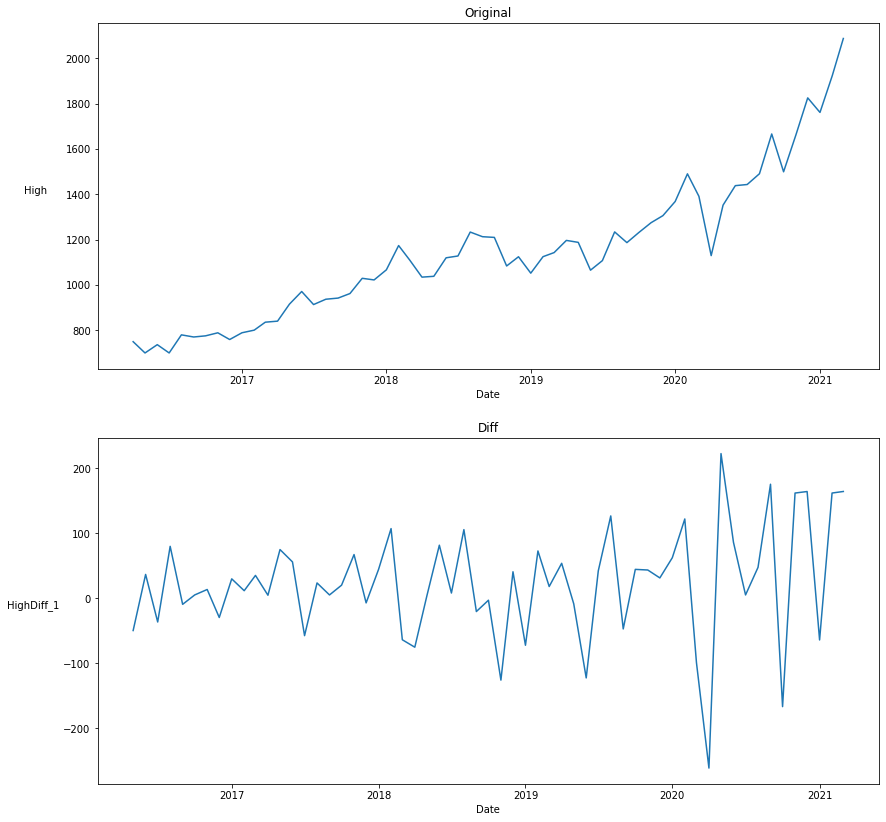

In [14]:
plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

ax = plt.subplot(211)
ax.set_title('Original')
ax.set_ylabel('High', rotation=0, labelpad=30)
google_price['High'].plot(ax=ax)

ax = plt.subplot(212)
ax.set_title('Diff')
ax.set_ylabel('HighDiff_1', rotation=0, labelpad=30)
google_price['HighDiff_1'].plot(ax=ax)

In [15]:
p_value = adfuller(google_price['HighDiff_1'][1:])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!'
)

Полученный уровень значимости (p-value): 0.1772. 0.1772 > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!


In [16]:
google_price['HighDiff_5'] = google_price.High.diff(5)

google_price.head(10)

,High,HighDiff_1,HighDiff_5
Date,,,
2016-04-01,750.340027,NaN,NaN
2016-05-01,700.640015,-49.700012,NaN
2016-06-01,737.210022,36.570007,NaN
2016-07-01,700.650024,-36.559998,NaN
2016-08-01,780.429993,79.779968,NaN
2016-09-01,771.020020,-9.409973,20.679993
2016-10-01,776.065002,5.044983,75.424988
2016-11-01,789.489990,13.424988,52.279968
2016-12-01,759.849976,-29.640015,59.199951


In [17]:
p_value = adfuller(google_price['HighDiff_5'][5:])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!'
)

Полученный уровень значимости (p-value): 0.9867. 0.9867 > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!


In [18]:
import numpy as np

google_price['HighLog'] = np.log(google_price['High'])

google_price.head(10)

,High,HighDiff_1,HighDiff_5,HighLog
Date,,,,
2016-04-01,750.340027,NaN,NaN,6.620526
2016-05-01,700.640015,-49.700012,NaN,6.551994
2016-06-01,737.210022,36.570007,NaN,6.602873
2016-07-01,700.650024,-36.559998,NaN,6.552009
2016-08-01,780.429993,79.779968,NaN,6.659845
2016-09-01,771.020020,-9.409973,20.679993,6.647714
2016-10-01,776.065002,5.044983,75.424988,6.654236
2016-11-01,789.489990,13.424988,52.279968,6.671387
2016-12-01,759.849976,-29.640015,59.199951,6.633121


In [19]:
p_value = adfuller(google_price['HighLog'])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!'
)

Полученный уровень значимости (p-value): 0.992. 0.992 > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!


In [20]:
google_price['HighLog'] = np.log(google_price['High'])
google_price['HighLogDiff_1'] = google_price['HighLog'].diff()

google_price.head()

,High,HighDiff_1,HighDiff_5,HighLog,HighLogDiff_1
Date,,,,,
2016-04-01,750.340027,NaN,NaN,6.620526,NaN
2016-05-01,700.640015,-49.700012,NaN,6.551994,-0.068532
2016-06-01,737.210022,36.570007,NaN,6.602873,0.050879
2016-07-01,700.650024,-36.559998,NaN,6.552009,-0.050864
2016-08-01,780.429993,79.779968,NaN,6.659845,0.107837


In [21]:
p_value = adfuller(google_price['HighLogDiff_1'][1:])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} < 0.05. Ряд станционарен'
)

Полученный уровень значимости (p-value): 0.0. 0.0 < 0.05. Ряд станционарен


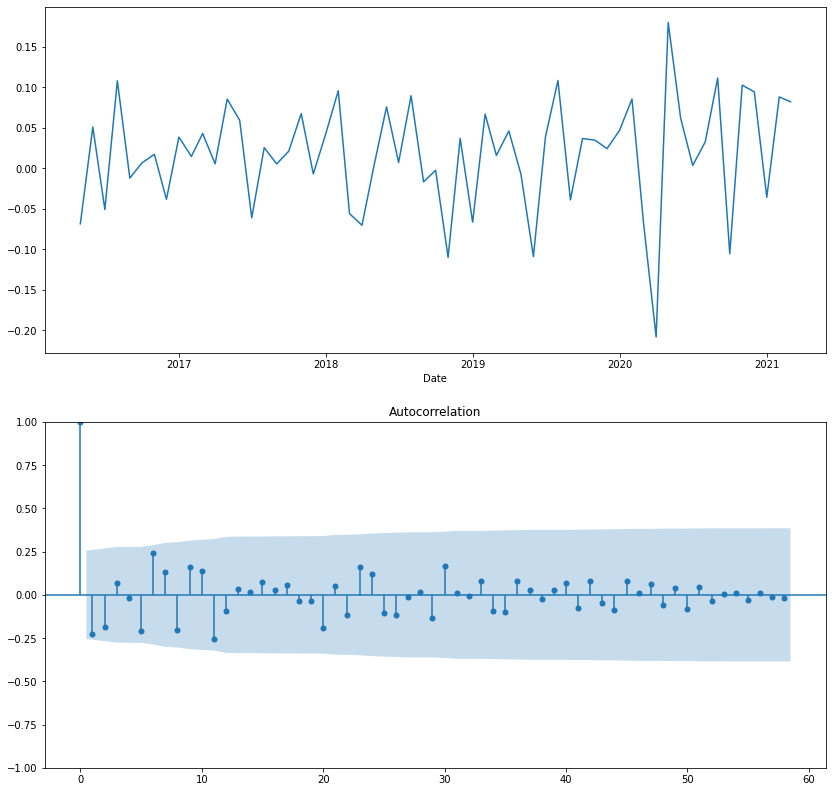

In [22]:
from statsmodels.graphics.tsaplots import plot_acf

# Построим корелограмму и проверим наличие значимых коррелаций
plt.figure(figsize=(14, 14))

ax = plt.subplot(211)
google_price['HighLogDiff_1'].plot(ax=ax)

ax = plt.subplot(212)
plot_acf(google_price['HighLogDiff_1'][1:], lags=58, ax=ax);

# Как можно видеть из графиков, среди 60 корреляций можно выделить только 2-3 значимый, при этом их значимость довольна мала
# Это может значить что ряд стационарет (опять-таки это скорее необходимое, но не достаточное требование к стационарности ряда)

(array([0.43719469, 0.        , 1.31158407, 2.62316813, 2.18597344,
        6.55792033, 6.12072564, 4.37194689, 1.74877875, 0.43719469]),
 array([-0.20798624, -0.16921827, -0.13045029, -0.09168232, -0.05291434,
        -0.01414637,  0.02462161,  0.06338958,  0.10215756,  0.14092553,
         0.1796935 ]),
 <BarContainer object of 10 artists>)

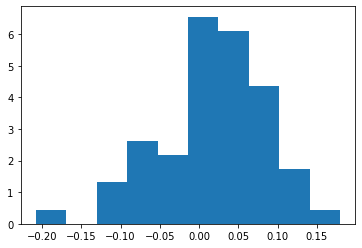

In [23]:
plt.hist(google_price['HighLogDiff_1'], density=True, bins=10)

#Напоминает нормальное распределение

<h1>Prediction</h1>

In [24]:
d=1
D=range(0,2)

qs = range(1, 4)
Qs = range(1, 3)

ps = range(1, 4)
Ps = range(3, 5)


size = len(google_price.HighLog)
percentile = int(0.8 * size)

X_train = google_price['HighLog'][:percentile]
X_test = google_price['HighLog'][percentile:]
y_train = google_price['High'][:percentile]
y_test = google_price['High'][percentile:]

In [26]:
from itertools import product
parameters = product(ps, qs, Ps, D, Qs)
parameters_list = list(parameters)
len(parameters_list)

72

In [27]:
import statsmodels.api as sm
from tqdm import tqdm

#warnings.filterwarnings('ignore')

results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    try:
        model = sm.tsa.statespace.SARIMAX(
            X_train, 
            order=(param[0], d, param[1]), 
            seasonal_order=(param[2], param[3], param[4], 6)
        ).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

#warnings.filterwarnings('default')

  0%|                                                    | 0/72 [00:00<?, ?it/s]/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  1%|▌                                           | 1/72 [00:01<01:56,  1.64s/it]/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inf

/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 12%|█████▌                                      | 9/72 [00:13<01:35,  1.52s/it]/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starti

 22%|█████████▌                                 | 16/72 [00:24<01:35,  1.71s/it]/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 24%|██████████▏                                | 17/72 [00:25<01:24,  1.54s/it]/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inf

/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 35%|██████████████▉                            | 25/72 [00:38<01:17,  1.65s/it]/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starti

/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 43%|██████████████████▌                        | 31/72 [00:47<01:08,  1.67s/it]/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starti

/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 53%|██████████████████████▋                    | 38/72 [00:59<01:01,  1.82s/it]/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 64%|███████████████████████████▍               | 46/72 [01:14<00:49,  1.89s/it]/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

 76%|████████████████████████████████▊          | 55/72 [01:30<00:33,  1.95s/it]/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimi

/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 86%|█████████████████████████████████████      | 62/72 [01:42<00:18,  1.87s/it]/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starti

/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 96%|█████████████████████████████████████████▏ | 69/72 [01:56<00:05,  2.00s/it]/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/kirilloid/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starti

In [28]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

        parameters         aic
1  (1, 1, 3, 0, 2) -131.807400
0  (1, 1, 3, 0, 1) -131.335000
4  (1, 1, 4, 0, 1) -131.231321
9  (1, 2, 3, 0, 2) -130.242368
5  (1, 1, 4, 0, 2) -130.229761


In [29]:
print(best_model.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                HighLog   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(3, 0, [1, 2], 6)   Log Likelihood                  73.904
Date:                                Wed, 03 Nov 2021   AIC                           -131.807
Time:                                        18:01:15   BIC                           -117.006
Sample:                                    04-01-2016   HQIC                          -126.238
                                         - 03-01-2020                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4603      0.677     -0.680      0.497      -1.788       0.867
ma.

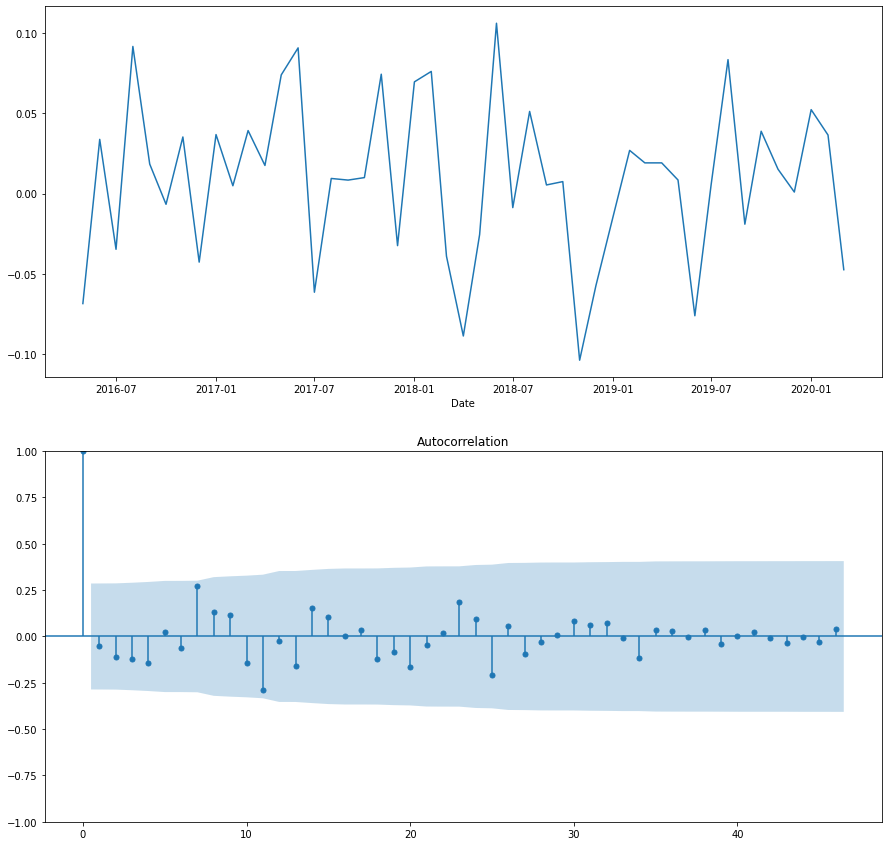

In [30]:
plt.figure(figsize=(15,15))

plt.subplot(211)
best_model.resid[1:].plot()

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[1:].values.squeeze(), lags=46, ax=ax);

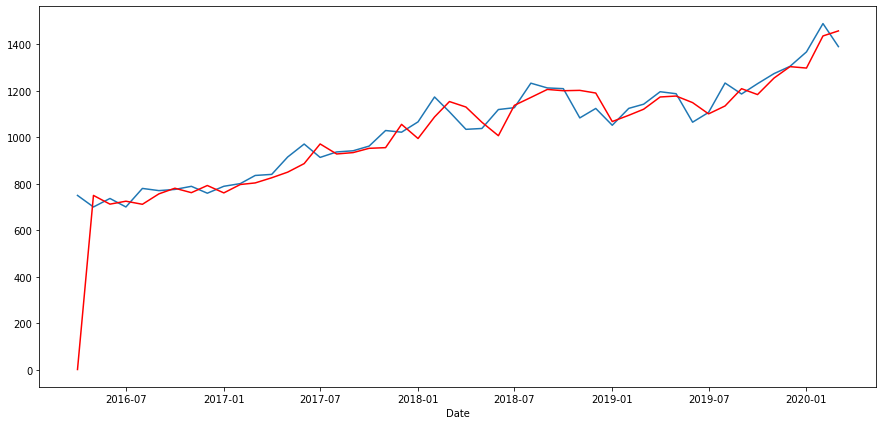

In [34]:
y_train_pred = np.exp(best_model.fittedvalues)

plt.figure(figsize=(15,7))

y_train.plot()
y_train_pred.plot(c='r');

<AxesSubplot:xlabel='Date'>

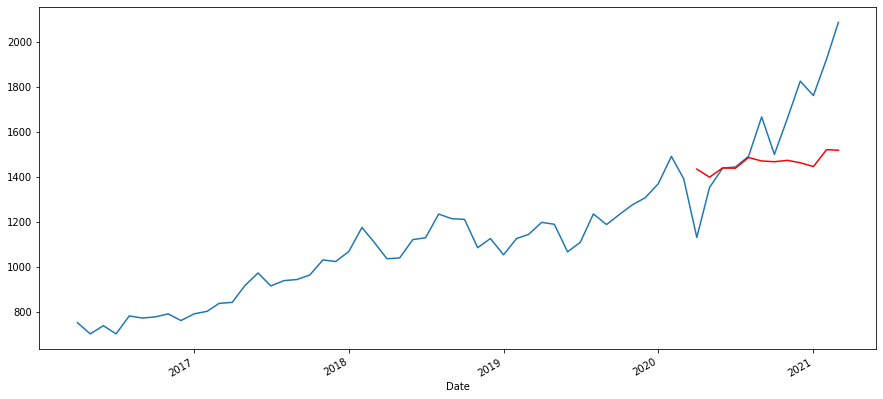

In [32]:
predict_len = size - percentile
y_pred = np.exp(best_model.predict(start=percentile, end=percentile + predict_len - 1))

plt.figure(figsize=(15,7))
google_price['High'].plot()
y_pred.plot(c='r')

In [33]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_pred, y_test)

0.1369118035591387